In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
'''
Read the log file as pandas dataframe

Use generation as index and skip the latter parameter rows 
and eliminate white space from columns
'''
def parse_log_file(file_path):
    df = pd.read_csv(file_path, sep='\t', index_col='gen', skiprows=lambda x: x > 31)
    df.columns = df.columns.str.replace(' ', '')
    return df

In [73]:
PATH_PREFIX = 'evoman_framework/specialist_A1/'
file_name = 'results_log_28-09-2019_11-50-55_enemy_1.txt'

df = parse_log_file(PATH_PREFIX + file_name)
df

,nevals,avg,std,min,max
gen,,,,,
0,100,1.87022,15.322600,-6.39859,66.1949
1,143,8.61409,19.582500,-5.75257,66.2254
2,151,14.13920,19.947300,-5.27300,66.2254
3,133,28.91060,22.317600,-5.24702,75.0919
4,141,43.07390,22.594800,-5.20401,75.0919
5,147,53.12140,18.970700,3.75298,75.0919
6,136,61.82700,11.940200,3.13070,75.0919
7,136,64.70320,5.616100,21.16230,74.8885
8,140,65.59370,5.104800,21.16230,74.8885


In [74]:
PATH_PREFIX = 'evoman_framework/specialist_A1/'
file_names = [
    'results_log_28-09-2019_11-50-55_enemy_',
    'results_log_29-09-2019_01-10-28_enemy_',
    'results_log_29-09-2019_07-33-56_enemy_'
]

enemy = '1'

df_concat = None

# Concatenate all the results in one big dataframe (for one enemy)
for f in file_names:
    df = parse_log_file(PATH_PREFIX + f + enemy + '.txt')
    if df_concat is None:
        df_concat = df
        continue
    df_concat = pd.concat((df_concat, df))

# Group them by row so we can keep the structure and do statistical analysis
grouped_row_index = df_concat.groupby(df_concat.index)

Averaged mean over specified runs (independent experiments) for one enemy

In [75]:
df_means = grouped_row_index.mean()
df_means

,nevals,avg,std,min,max
gen,,,,,
0,100.000000,-1.371130,10.716540,-6.113487,57.363100
1,143.333333,3.803289,15.024867,-5.779453,60.373267
2,141.000000,11.843127,18.687533,-5.273000,63.373267
3,138.000000,25.762467,20.376167,-5.248770,69.157833
4,136.666667,39.958833,19.781533,-5.205817,69.157833
5,140.000000,51.421200,16.918833,0.751410,78.425833
6,139.333333,59.317200,10.970187,12.357600,78.425833
7,138.000000,62.999133,7.933040,6.520043,77.386500
8,145.666667,66.542933,6.713723,33.359200,77.410667


Averaged std over specified runs (independent experiments) for one enemy

In [76]:
df_std = grouped_row_index.std()
df_std

,nevals,avg,std,min,max
gen,,,,,
0,0.000000,2.858181,4.279287,0.248222,9.021961
1,5.507571,4.429036,3.986547,0.027829,5.076098
2,9.165151,2.223423,2.675584,0.000000,4.885496
3,5.567764,4.105022,3.987999,0.003031,5.139132
4,12.096832,7.456893,2.454011,0.008368,5.139132
5,6.244998,4.821623,3.259223,5.217303,14.226565
6,3.055050,2.693150,2.808022,9.301578,14.226565
7,5.291503,1.501925,2.182310,13.423208,12.659412
8,5.131601,2.218665,2.898672,20.616205,12.627301


For each Task/algorithm, plot the average/standard deviation of the fitness and energy points (life) of the agents across the generations using a line-plot. Note that you need to calculate the average (over the 10 runs) of the average (over the populations).

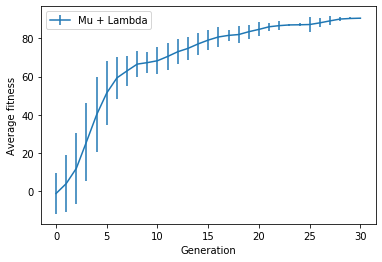

In [128]:
# Average fitness + std
plt.errorbar(df_means.index, df_means['avg'], yerr=df_means['std'], label="Mu + Lambda")
plt.ylabel('Average fitness')
plt.xlabel('Generation')
plt.legend()
plt.show()

# Average life + std
# plt.errorbar(df_means.index, df_means['life_avg'], yerr=df_std['life_avg'], label="Mu + Lambda")
# plt.ylabel('Average life')
# plt.xlabel('Generation')
# plt.legend()
# plt.show()

For each Task/algorithm/enemy, test your final best solution for each of the 10 independent runs, and present this result in a box-plot. Additionally, do a statistical test to verify if the differences in average are significant.

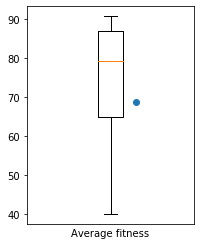

In [129]:
### TODO: Actually use the best solution fitness values,
### instead of the averaged 10 run average population values,
### gathered for the previous line plot

fig = plt.figure(figsize=(3, 4))
# Boxplot of x-run averages of average population fitness
plt.boxplot(df_means['avg'], showfliers=False)
# Plot arithmetic mean
plt.scatter(1.15, df_means['avg'].mean())
# Hide x-axis ticks
plt.xticks([], [])
plt.xlabel('Average fitness')
plt.show()